In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.datasets import cifar10  # dataset
import numpy as np

# Load example data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize
x_train = x_train / 255.0
x_test = x_test / 255.0

# Build CNN
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

# Save
model.save('/content/drive/MyDrive/Age_Activation_Figure/cnn_model.h5')

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 72s 45ms/step - accuracy: 0.3976 - loss: 1.6631 - val_accuracy: 0.5892 - val_loss: 1.1663
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 45ms/step - accuracy: 0.6123 - loss: 1.1020 - val_accuracy: 0.6489 - val_loss: 1.0033
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 72s 46ms/step - accuracy: 0.6617 - loss: 0.9709 - val_accuracy: 0.6747 - val_loss: 0.9500
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 70s 45ms/step - accuracy: 0.6998 - loss: 0.8663 - val_accuracy: 0.6780 - val_loss: 0.9385
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 72s 46ms/step - accuracy: 0.7251 - loss: 0.8006 - val_accuracy: 0.6835 - val_loss: 0.9254


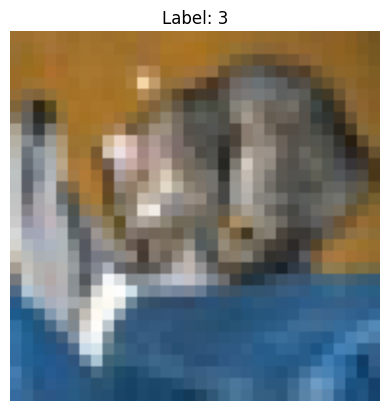

In [8]:
import cv2
import matplotlib.pyplot as plt

# Resize (for better display only)
resized_img = cv2.resize(original_img, (128, 128), interpolation=cv2.INTER_NEAREST)

plt.imshow(resized_img)
plt.title(f"Label: {y_test[0][0]}")
plt.axis('off')
plt.show()

### We used the CIFAR-10 dataset with 32×32 images. Due to low resolution, visualizations appear slightly blurry but still demonstrate activated regions effectively.

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │       147,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 502,688 (1.92 MB)

 Trainable params: 167,562 (654.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 335,126 (1.28 MB)

Last convolutional layer: conv2d_3


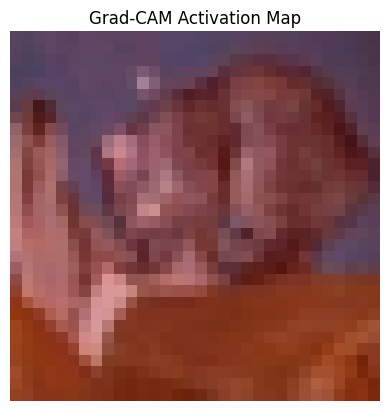

In [28]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2

# 1. Ensure the model is built
model.build((None, 32, 32, 3))  # Input shape should match the training data

# 2. Verify that the layers are properly initialized (optional, you can check the model summary)
model.summary()

# 3. Get the name of the last convolutional layer
last_conv_layer_name = None
for i, layer in enumerate(model.layers):
    if 'conv' in layer.name:  # Find the last convolutional layer
        last_conv_layer_name = layer.name
if last_conv_layer_name is None:
    raise ValueError("No convolutional layer found in the model.")
print(f"Last convolutional layer: {last_conv_layer_name}")

# Build model
_ = model(np.zeros((1, 32, 32, 3)))

# 4. Preprocess a sample image from the test set
img_array = np.expand_dims(x_test[0], axis=0) / 255.0  # Normalize the image
original_img = x_test[0]  # Save the original image for later visualization

# Make predictions to build the model
predictions = model(img_array, training=False)

# Create Grad-CAM model
inputs = tf.keras.Input(shape=(32, 32, 3))
x = inputs
for layer in model.layers:
    x = layer(x)
    if layer.name == last_conv_layer_name:
        conv_output = x
grad_model = tf.keras.Model(inputs=inputs, outputs=[conv_output, x])

# Perform Grad-CAM calculation
with tf.GradientTape() as tape:
    conv_outputs, predictions = grad_model(img_array)
    tape.watch(conv_outputs)
    loss = predictions[:, tf.argmax(predictions[0])]

# Compute the gradients of the top class with respect to the conv outputs
grads = tape.gradient(loss, conv_outputs)

if grads is not None:
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))  # Average the gradients
    # Apply Grad-CAM formula to get the heatmap
    conv_outputs = conv_outputs[0]
    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]  # Weighted sum of activations
    heatmap = tf.squeeze(heatmap)  # Remove unnecessary dimensions

    # Normalize and resize the heatmap
    heatmap = np.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)  # Normalize to [0, 1]
    heatmap = heatmap.numpy()
    heatmap = cv2.resize(heatmap, (32, 32))  # Resize heatmap to match input size
    heatmap = np.uint8(255 * heatmap)  # Convert to 8-bit

    # Apply a color map to the heatmap for visualization
    heatmap_color = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

    # Superimpose the heatmap onto the original image
    original_img_scaled = (original_img * 255).astype(np.uint8)
    superimposed_img = cv2.addWeighted(original_img_scaled, 0.6, heatmap_color, 0.4, 0)

    # Display the result
    plt.imshow(cv2.cvtColor(superimposed_img, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB
    plt.title("Grad-CAM Activation Map")
    plt.axis('off')
    plt.show()
else:
    print("Gradients are None. Check the computation graph.")